In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import corner
from scipy import stats
from enterprise_extensions.model_utils import bayes_fac

In [18]:
# plt.rcParams['axes.labelsize'] = 14  # Set size for x and y axis labels
# # plt.rcParams['xtick.labelsize'] = 14  # Set size for x-tick labels
# # plt.rcParams['ytick.labelsize'] = 14  # Set size for y-tick labels
# plt.rcParams['axes.titlesize'] = 16  # Set size for title
# plt.rcParams['axes.titleweight'] = 'bold'  # Make title bold
# # plt.rc('font', family='Times New Roman')

In [19]:
# psrlist = ['J0023+0923_synthetic_injectedactual',]
# psrlist = ['J0610-2100',]
psrlist = ['J0023+0923',]

In [33]:
psr = None
# chain_folder = "/lorule/scratch/jdt00012/chains_14Feb_2025"
# if psrlist[0][-1] in "45":
#     chain_folder = "/lorule/scratch/jdt00012/chains_19Feb_2025"
# chain_folder = "/lorule/scratch/jdt00012/May/chains_06May_2025"
chain_folder = "/lorule/scratch/jdt00012/chains_13Jun_2025"

# params = ['log_T', 'nu', 'phi_minus', 'phi_plus']
params = ['RN_gamma', 'RN_log10_A', 'log_T', 'nu', 'phi', 'theta']

PSR J0023+0923
Chain shape = (437701, 10)


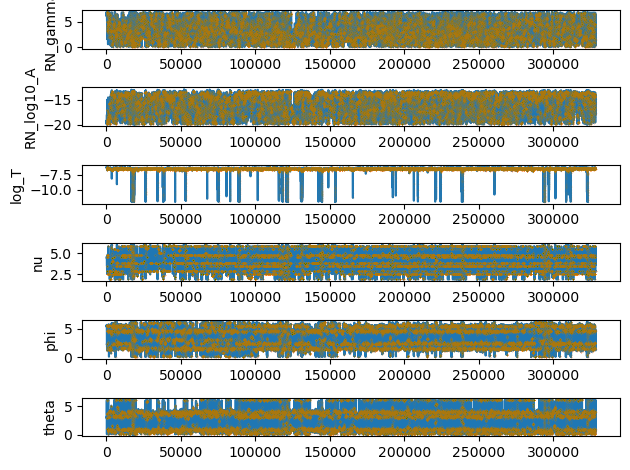

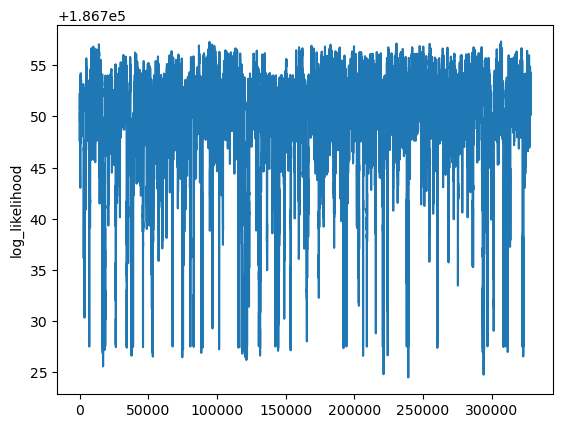

<Figure size 640x480 with 0 Axes>

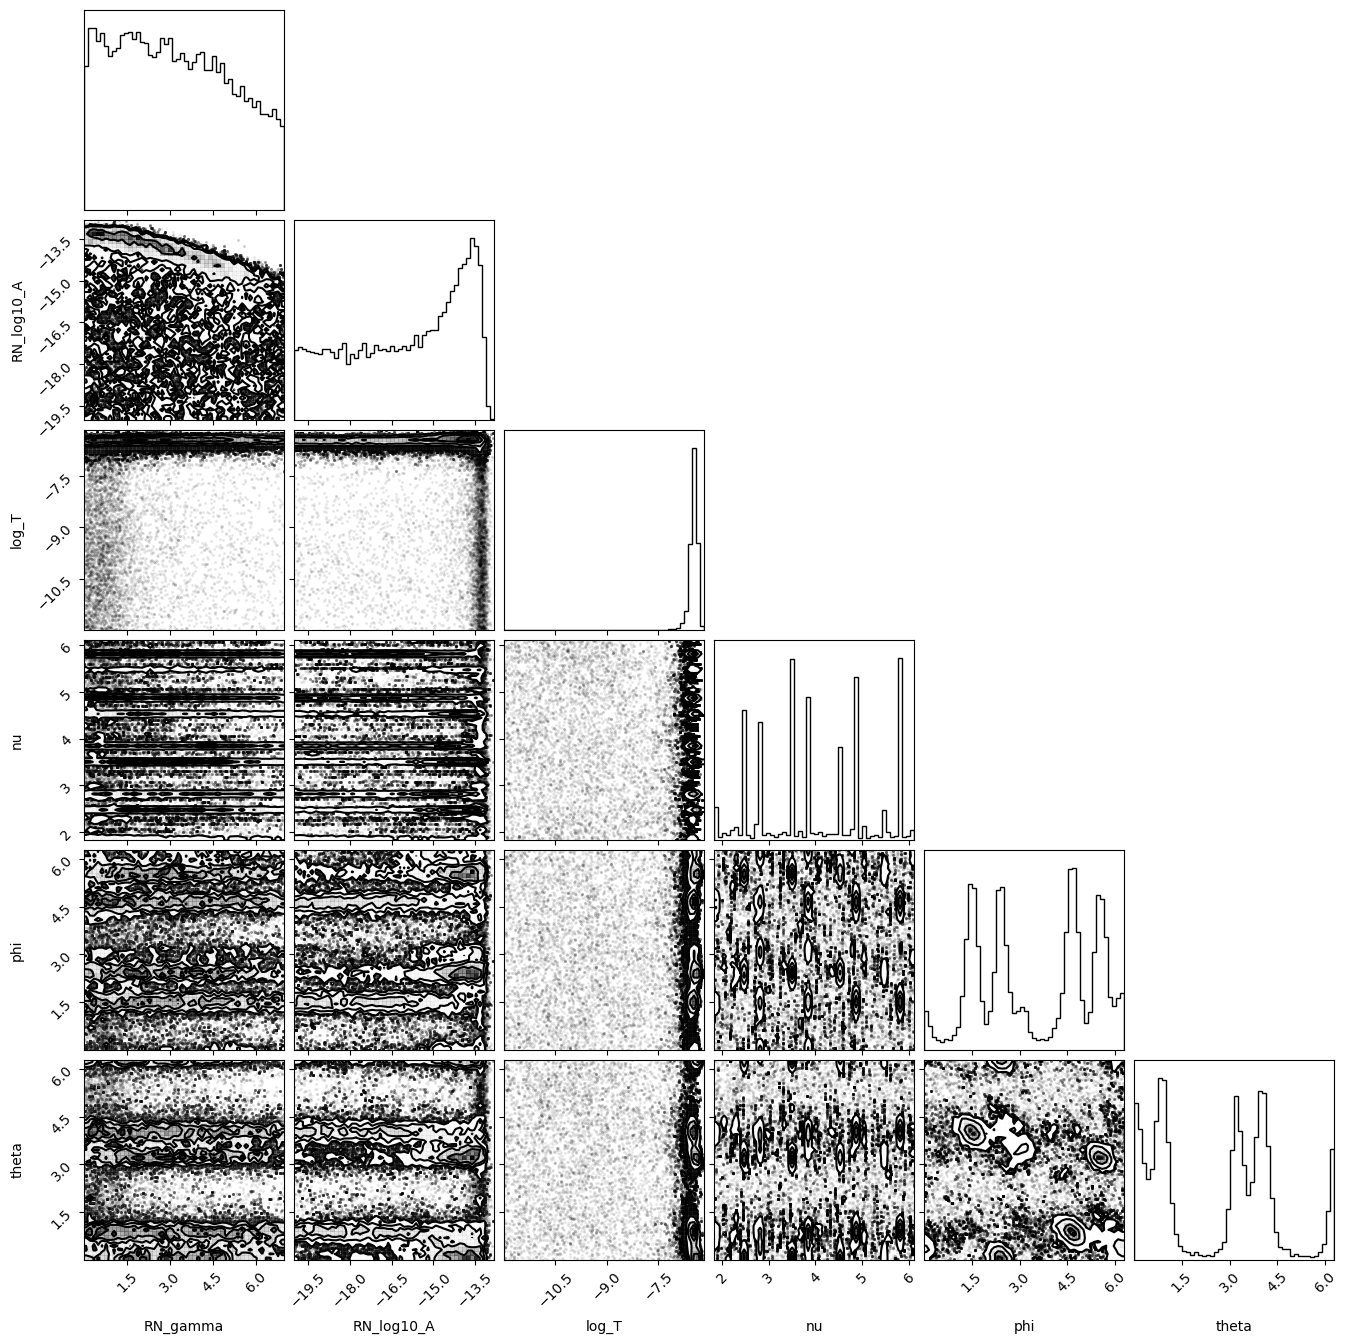

In [34]:
for psr in psrlist:
    chain_file = f"{chain_folder}/{psr}/chain_1.0.txt"
    # chain_file = f"{chain_folder}/{psr}/chain_1.5773502691896257.txt"
    chain = np.genfromtxt(chain_file)
    print(f"PSR {psr}")
    print(f"Chain shape = {chain.shape}")
    chain[:,3] *= 86400 / (2*np.pi) # convert 2pi/s to 1/day
    # chain[:,4] %= (2*np.pi)
    # chain[:,5] %= (2*np.pi)
    ndim = len(params)
    percent_burn = 0.25
    burn = int(chain.shape[0] * percent_burn)
    fig, axs = plt.subplots(ndim, 1)
    for i, param in enumerate(params):
        ax = axs[i]
        ax.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
        ax.plot(chain[burn:, i], "o", markersize = 0.01)
        ax.set_ylabel(param)
    fig.tight_layout()
    plt.show()

    plt.plot(chain[burn:, -3])
    plt.ylabel('log_likelihood')
    plt.show()

    T_strength = psr[-1]
    if T_strength == "l":
        T_strength = "0 (in other words, no signal by design)"
    else:
        T_strength = f"1e-{T_strength}"
    # corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
    plt.suptitle(f"Posteriors for T = {T_strength} seconds INJECTED SIGNAL | J0023+0923")
    corner.corner(chain[burn:,:-4], labels=params,  plot_contours=True, bins = 50)
    plt.show()

In [28]:
logT_chain = chain[burn:,2]
bayes_fac(logT_chain, logAmin=-12, logAmax=-4, delta_max = 0.13, delta_N = 100, ntol = 50)

(26.897461800165676, 1.4968972143552108)

In [20]:
chain[burn:,2]

array([-6.54109814, -6.54109814, -6.54109814, ..., -6.50524178,
       -6.50524178, -6.50524178])

In [21]:
chain[:,2]

array([-7.65361363, -7.66205115, -7.66205115, ..., -6.50524178,
       -6.50524178, -6.50524178])

In [23]:
def bayes_fac(samples, ntol=200, logAmin=-18, logAmax=-14, delta_max = 0.1, delta_N = 100):
    """
    Computes the Savage Dickey Bayes Factor and uncertainty.

    :param samples: MCMCF samples of GWB (or common red noise) amplitude
    :param ntol: Tolerance on number of samples in bin

    :returns: (bayes factor, 1-sigma bayes factor uncertainty)

    """

    prior = 1 / (logAmax - logAmin)
    dA = np.linspace(0.01, delta_max, delta_N)
    bf = []
    bf_err = []
    mask = []  # selecting bins with more than 200 samples

    for ii, delta in enumerate(dA):
        n = np.sum(samples <= (logAmin + delta))
        N = len(samples)

        post = n / N / delta

        bf.append(prior / post)
        bf_err.append(bf[ii] / np.sqrt(n))

        if n > ntol:
            mask.append(ii)

    return np.mean(np.array(bf)[mask]), np.std(np.array(bf)[mask])

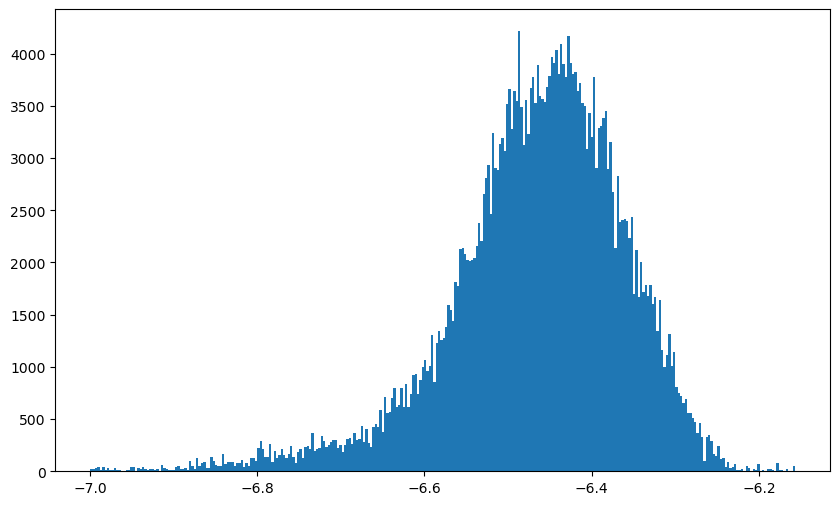

In [32]:
logT_chain = chain[burn:,2]
logT_chain = logT_chain[logT_chain > -7]
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(logT_chain, bins = 300)
# ax.set_xlim(-7, -6)
plt.show()

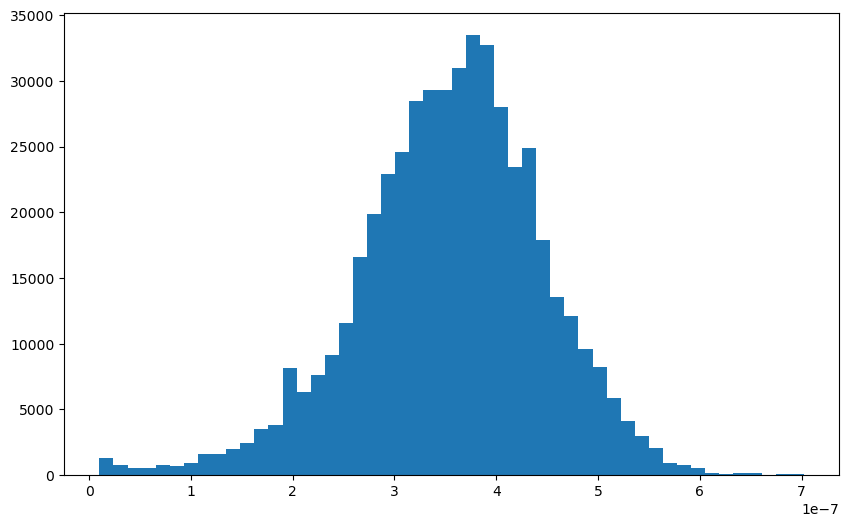

In [50]:
T_chain = 10**chain[burn:,2]
T_chain = T_chain[T_chain > 1e-8]
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(T_chain, bins = 50)
plt.show()

In [79]:
nu_expected = 3.3343e-04
nu_day = 2*np.pi / 86164.0905
print(f"{nu_day=}\n")
for i in range(int(nu_expected // nu_day)):
    nu_harmonic = nu_expected - i*nu_day
    print(f"expected nu - {i}*nu_day = {nu_harmonic}")

nu_day=7.292115857915991e-05

expected nu - 0*nu_day = 0.00033343
expected nu - 1*nu_day = 0.00026050884142084013
expected nu - 2*nu_day = 0.0001875876828416802
expected nu - 3*nu_day = 0.00011466652426252028


In [9]:
3.3343e-04 * 86400 / (2*np.pi) # expected nu in units of 1/day

4.584991623131289

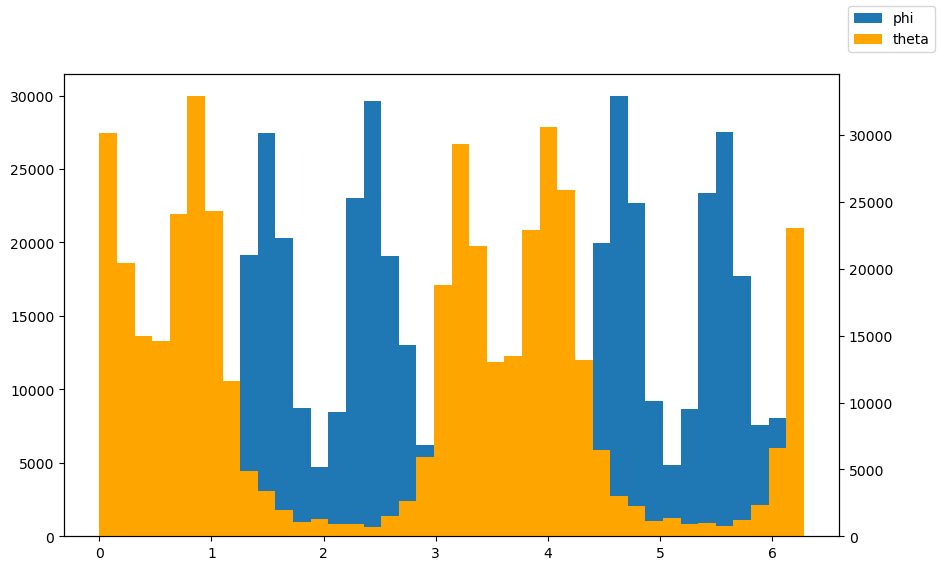

In [35]:
phi = chain[:,4]
theta = chain[:,5]

bins = 40
fig, ax = plt.subplots(figsize = (10,6))
ax.twinx().hist(theta, bins = bins, color = "orange", label="theta")
ax.hist(phi, bins = bins, label = "phi")
fig.legend()
plt.show()

In [49]:
f = 8.3387216124607300574e-05 * 86400
print(f"f = {f} per day")

f = 7.204655473166071 per day


3.502350236812036
7.004700473624072


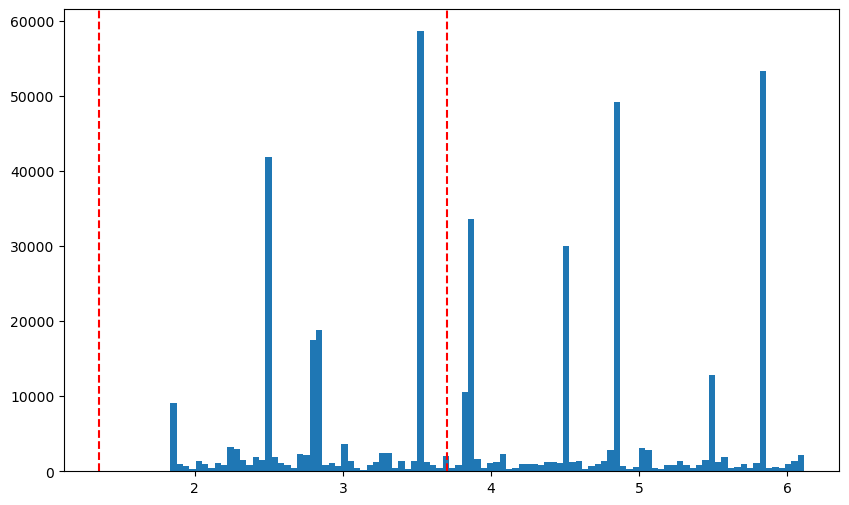

In [58]:
nu = chain[:,3]
bins = 100
fig, ax = plt.subplots(figsize = (10,6))
N, bin_loc, _ = ax.hist(nu, bins = bins, label = "nu")
# ax.axvline(x = 5.7660216626125782636, color='r', linestyle='--') # this is a harmonic of the other libration frequency (see noise_histogram.ipynb)
# ax.axvline(x = 5.7660216626125782636, color='r', linestyle='--')
ax.axvline(x = f - 5.85, color='r', linestyle='--')
ax.axvline(x = f - 3.5, color='r', linestyle='--')
nu_best = bin_loc[np.argmax(N)]
print(nu_best)
print(nu_best*2)
plt.show()

5.004700473624072
10.009400947248144


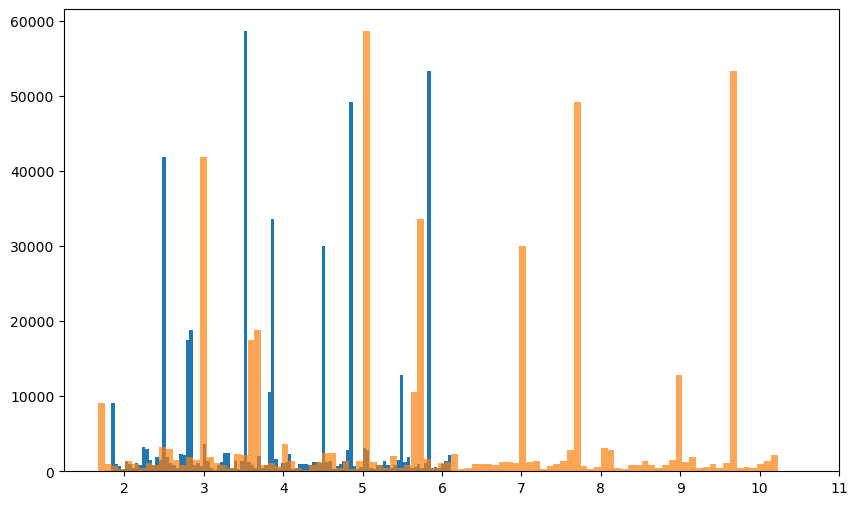

In [45]:
nu = chain[:,3]
bins = 100
fig, ax = plt.subplots(figsize = (10,6))
N, bin_loc, _ = ax.hist(nu, bins = bins, label = "nu")
N, bin_loc, _ = ax.hist(2*nu - 2, bins = bins, label = "2 nu - 2", alpha = 0.7)
nu_best = bin_loc[np.argmax(N)]
print(nu_best)
print(nu_best*2)
ax.set_xticks(np.arange(2, 12, 1))
plt.show()

(array([2.0300e+02, 2.9300e+02, 5.7000e+01, 1.1300e+02, 1.1350e+03,
        2.1700e+02, 5.5000e+01, 5.7945e+04, 1.2400e+02, 3.9900e+02,
        1.8300e+02, 1.6700e+02, 6.3600e+02, 3.5400e+02, 3.5800e+02,
        1.3800e+02, 1.8200e+02, 1.3200e+02, 4.7000e+01, 4.8000e+01,
        3.1500e+02, 2.0400e+02, 6.5000e+01, 1.7930e+03, 8.1000e+01,
        2.3700e+02, 7.1000e+01, 4.8000e+02, 1.1100e+02, 2.3100e+02]),
 array([3.40025731, 3.41357427, 3.42689123, 3.44020819, 3.45352515,
        3.46684211, 3.48015908, 3.49347604, 3.506793  , 3.52010996,
        3.53342692, 3.54674388, 3.56006085, 3.57337781, 3.58669477,
        3.60001173, 3.61332869, 3.62664565, 3.63996261, 3.65327958,
        3.66659654, 3.6799135 , 3.69323046, 3.70654742, 3.71986438,
        3.73318135, 3.74649831, 3.75981527, 3.77313223, 3.78644919,
        3.79976615]),
 <BarContainer object of 30 artists>)

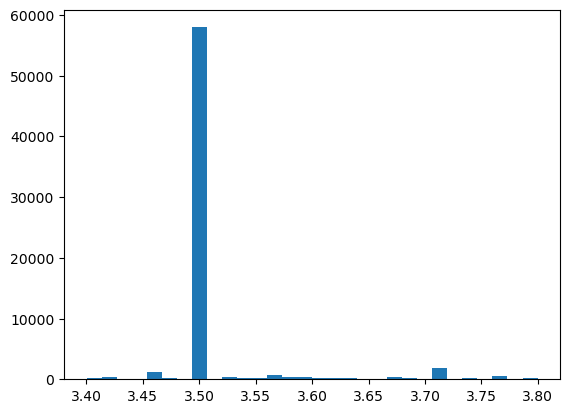

In [56]:
mask = np.logical_and(nu < 3.8, nu > 3.4)
plt.hist(nu[mask], bins = 30)

In [57]:
f - 3.50

3.7046554731660706

PSR J0023+0923
Chain shape = (100001, 10)


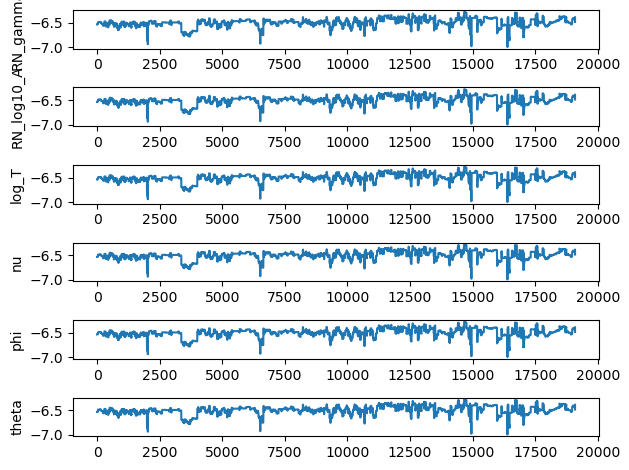

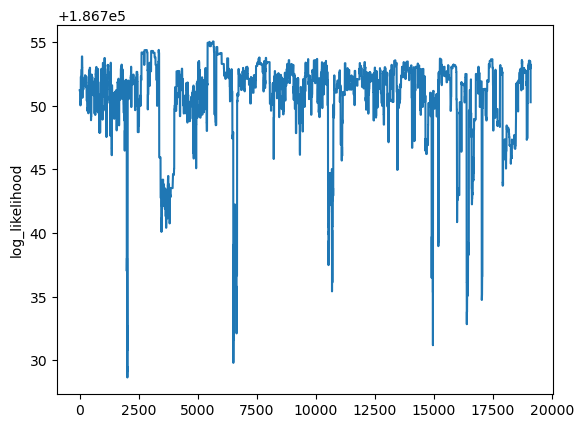

<Figure size 640x480 with 0 Axes>

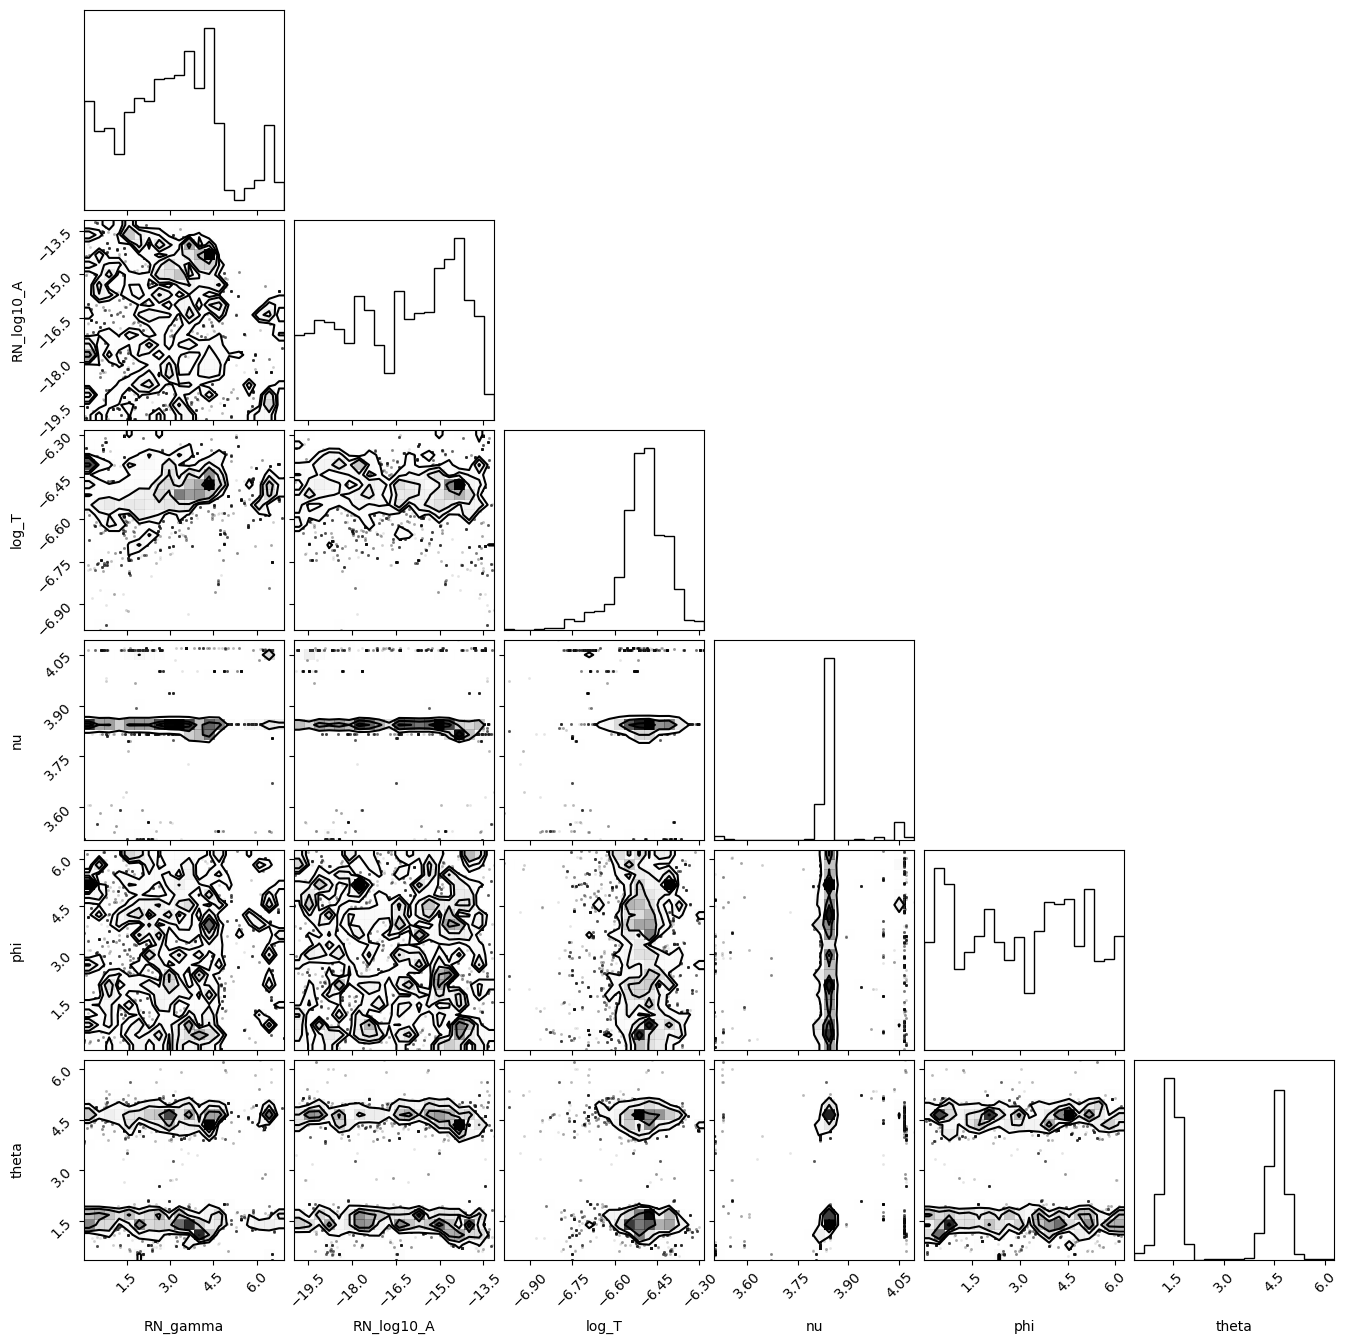

In [36]:

chain_file = f"{chain_folder}/{psr}/chain_1.0.txt"
# chain_file = f"{chain_folder}/{psr}/chain_1.5773502691896257.txt"
chain = np.genfromtxt(chain_file)
print(f"PSR {psr}")
print(f"Chain shape = {chain.shape}")
chain[:,3] *= 86400 / (2*np.pi) # convert 2pi/s to 1/day
chain[:,4] %= (2*np.pi)
chain[:,5] %= (2*np.pi)

nu = chain[:,3]
T = chain[:,2]
mask = np.logical_and(nu > 3.5, nu < 4.1,)
mask = np.logical_and(mask, T > -7)
chain = chain[mask]

ndim = len(params)
percent_burn = 0.4
burn = int(chain.shape[0] * percent_burn)
fig, axs = plt.subplots(ndim, 1)
for i, param in enumerate(params):
    ax = axs[i]
    ax.plot(chain[burn:, 2], ls='-', marker=None, alpha=1.0)
    ax.set_ylabel(param)
fig.tight_layout()
plt.show()

plt.plot(chain[burn:, -3])
plt.ylabel('log_likelihood')
plt.show()

T_strength = psr[-1]
if T_strength == "l":
    T_strength = "0 (in other words, no signal by design)"
else:
    T_strength = f"1e-{T_strength}"
# corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
plt.suptitle(f"Posteriors for T = {T_strength} seconds INJECTED SIGNAL | J0023+0923")
corner.corner(chain[burn:,:-4], labels=params,  plot_contours=True)
plt.show()


PSR J0023+0923
Chain shape = (99900, 10)


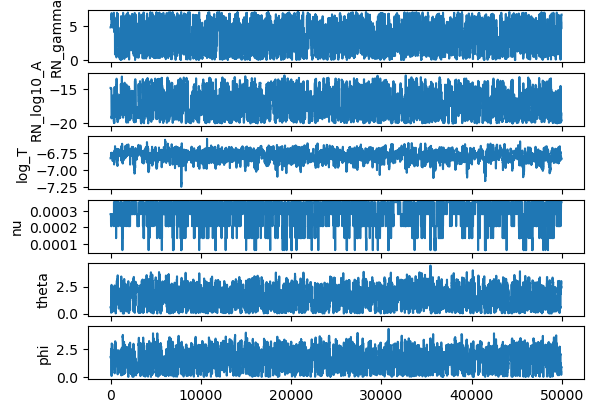

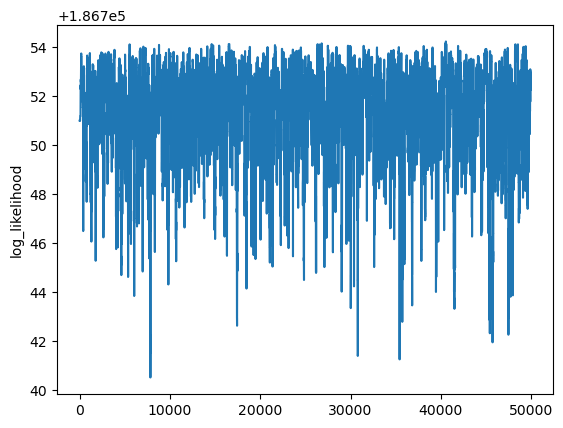

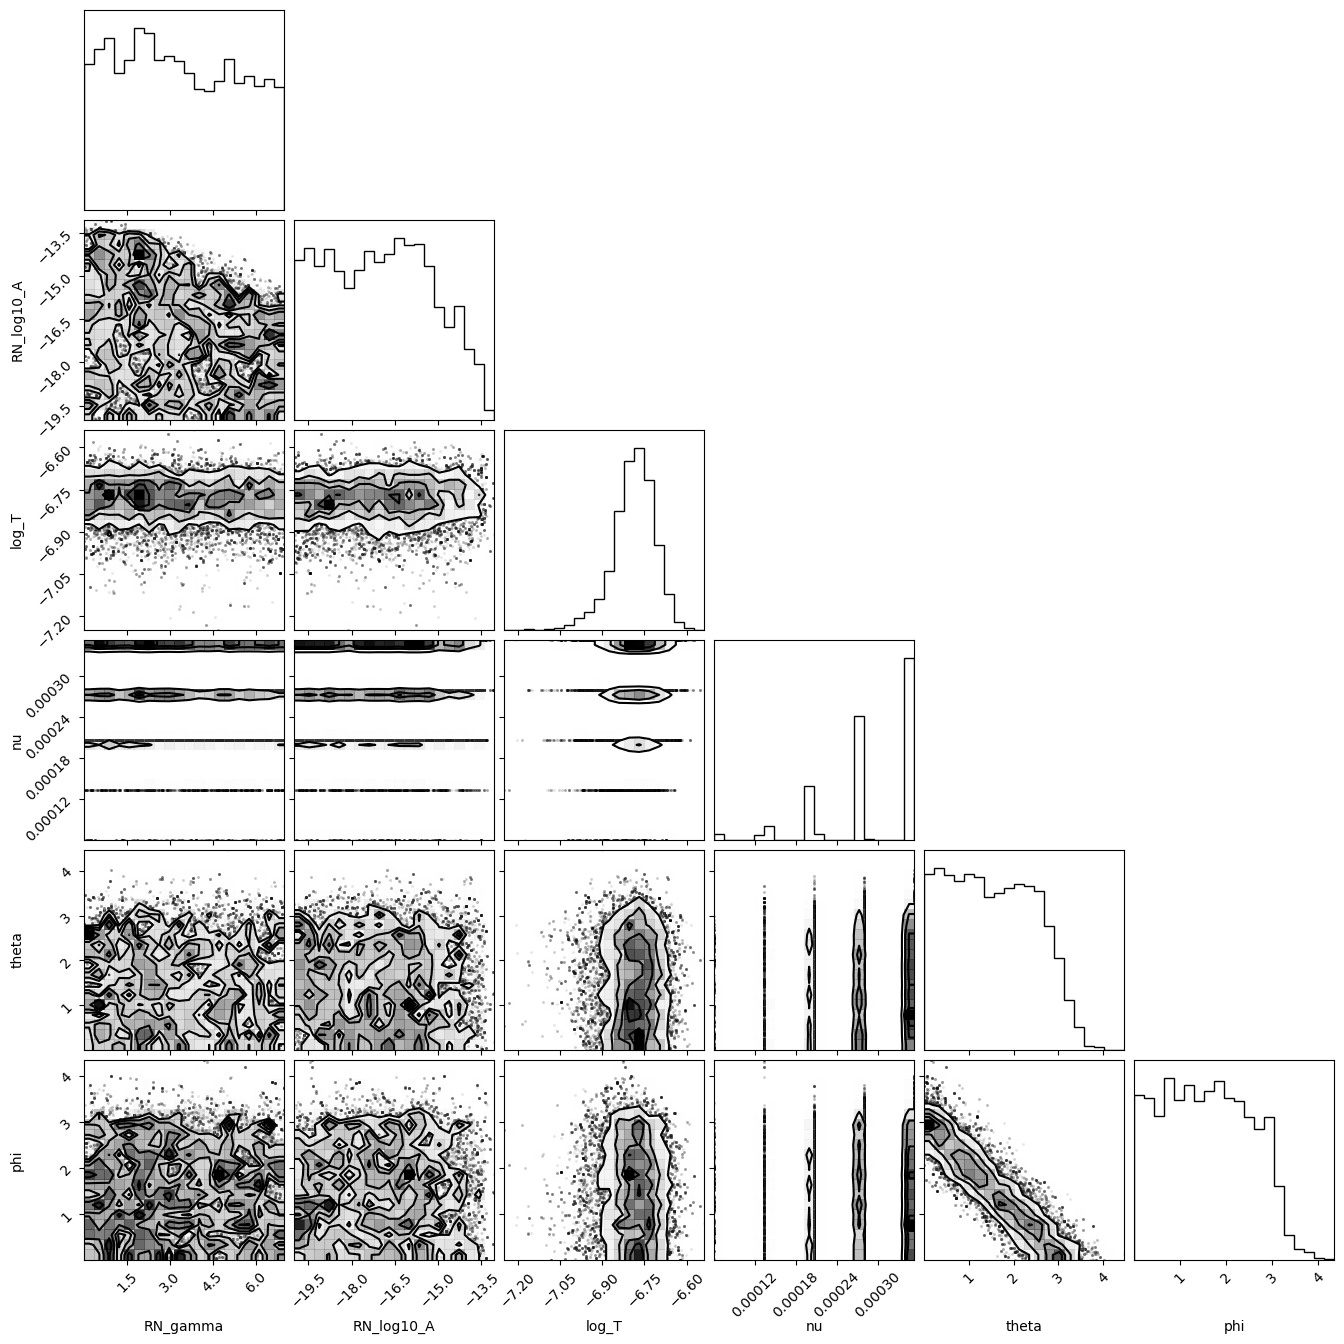

In [21]:
psrlist = ['J0023+0923',]
psr = None
chain_folder = "/lorule/scratch/jdt00012/Nov/chains_12Nov_2024"
if psr is None:
    for psr in psrlist:
        chain_file = f"{chain_folder}/{psr}/chain_1.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//2 # burn the first half if //2
        for i, param in enumerate(params):
            plt.subplot(ndim, 1, i + 1)
            plt.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
            plt.ylabel(param)
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        corner.corner(chain[burn:,:-4], labels=params,  plot_contours=True)
        plt.show()

(array([  47.,  103.,  267.,  695., 1328., 2640., 4779., 6446., 8071.,
        7875., 6824., 4430., 3261., 1551.,  872.,  414.,  240.,   51.,
          37.,   19.]),
 array([0.85251312, 0.92905154, 1.00558997, 1.08212839, 1.15866682,
        1.23520524, 1.31174367, 1.38828209, 1.46482051, 1.54135894,
        1.61789736, 1.69443579, 1.77097421, 1.84751264, 1.92405106,
        2.00058949, 2.07712791, 2.15366633, 2.23020476, 2.30674318,
        2.38328161]),
 <BarContainer object of 20 artists>)

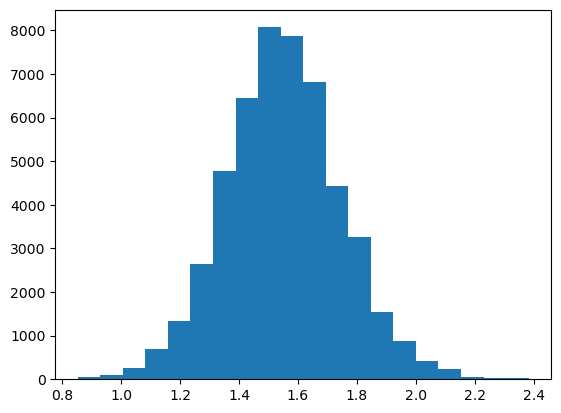

In [26]:
phi_plus = chain[burn:,4]
phi_minus = chain[burn:,5]
theta = (phi_plus + phi_minus) / 2
phi = (phi_plus - phi_minus) / 2
plt.hist(theta, bins = 20)

(array([  86.,  301., 1493., 3159., 3705., 3087., 3630., 3950., 3342.,
        3102., 3318., 3602., 3386., 3721., 3422., 2949., 2676.,  929.,
          86.,    6.]),
 array([-2.09958203, -1.88640291, -1.6732238 , -1.46004468, -1.24686556,
        -1.03368645, -0.82050733, -0.60732822, -0.3941491 , -0.18096999,
         0.03220913,  0.24538825,  0.45856736,  0.67174648,  0.88492559,
         1.09810471,  1.31128383,  1.52446294,  1.73764206,  1.95082117,
         2.16400029]),
 <BarContainer object of 20 artists>)

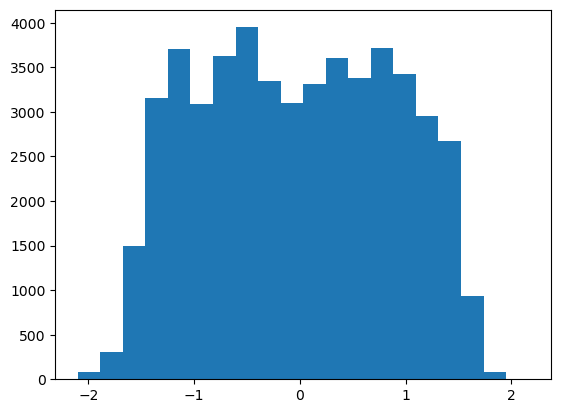

In [27]:
plt.hist(phi, bins =20)

(array([3505., 3437., 3061., 3860., 3399., 3713., 3364., 3589., 3797.,
        3446., 3382., 3031., 2783., 3029., 1563.,  527.,  233.,  167.,
          40.,   24.]),
 array([7.01472177e-04, 2.17800998e-01, 4.34900525e-01, 6.52000051e-01,
        8.69099577e-01, 1.08619910e+00, 1.30329863e+00, 1.52039816e+00,
        1.73749768e+00, 1.95459721e+00, 2.17169673e+00, 2.38879626e+00,
        2.60589579e+00, 2.82299531e+00, 3.04009484e+00, 3.25719436e+00,
        3.47429389e+00, 3.69139342e+00, 3.90849294e+00, 4.12559247e+00,
        4.34269200e+00]),
 <BarContainer object of 20 artists>)

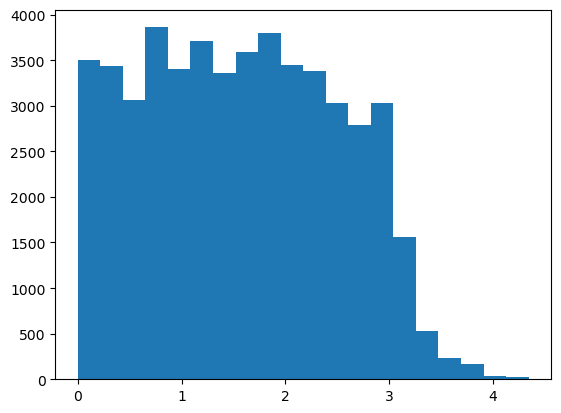

In [28]:
plt.hist(phi_minus, bins = 20)

In [23]:
best_values_median = np.median(chain, axis=0)
print("Best values (median):", best_values_median)

Best values (median): [ 3.10571501e+00 -1.83248321e+01 -6.78237225e+00  2.79612836e-04
  2.36207396e+00  1.14022724e+00  1.86747926e+05  1.86749288e+05
  3.81300000e-02  1.00000000e+00]


In [24]:
best_values_map = []
for i in range(chain.shape[1]):
    hist, bin_edges = np.histogram(chain[:, i], bins=50, density=True)
    max_bin = np.argmax(hist)
    best_values_map.append(0.5 * (bin_edges[max_bin] + bin_edges[max_bin + 1]))

print("Best values (MAP):", best_values_map)

Best values (MAP): [3.1499760344938643, -19.23548772799338, -6.7765099063016, 0.0003563770072213599, 4.9515976412360505, 1.1725836775792258, 186687.51476155999, 186688.87649956, 0.03292883, 1.01]


In [29]:
B_med = np.median(chain[:,2])
print(B_med)

chain_ij = np.where(chain == B_med)
chain_i = chain_ij[0][0]
chain_j = chain_ij[1][0]
chain[chain_i, chain_j]


-6.7823722481364


-6.7823722481364

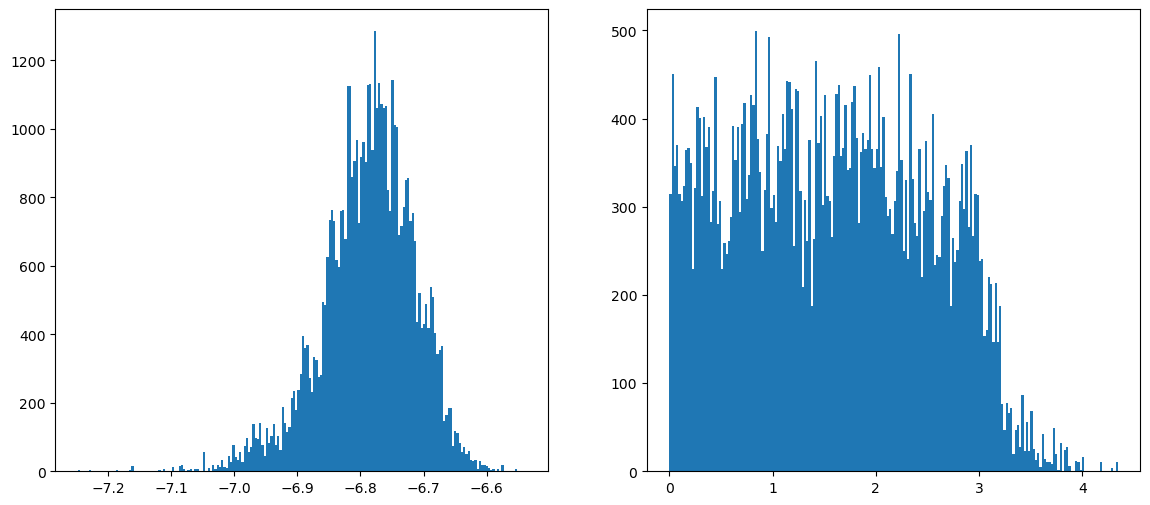

In [10]:
log_B_chain = chain[burn:, 2]
phi_plus_chain = chain[burn:, 5]
nbins = 200

fig, axs = plt.subplots(1,2, figsize = (14, 6))
axs[0].hist(log_B_chain, bins = nbins)
axs[1].hist(phi_plus_chain, bins = nbins)
plt.show()

0.8344633387483447


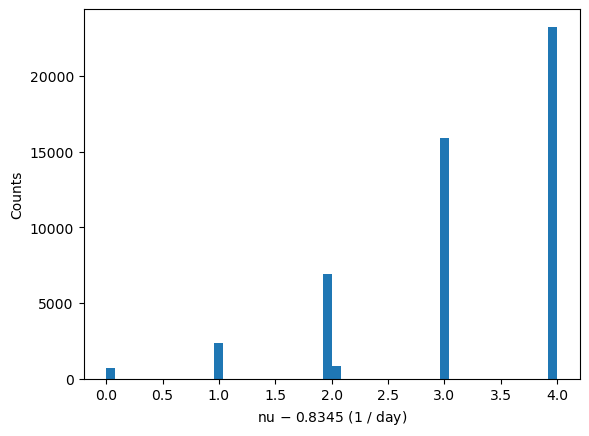

In [11]:
nu_day = 2*np.pi / 86164.0905
# nu_day = 2*np.pi / 86400
# nu_day = 1
nu_chain = chain[burn:, 3] / nu_day
mask = nu_chain < 1
mode_result = stats.mode(nu_chain[mask])
nu_mode = mode_result.mode
print(f"{nu_mode}")
nbins = 50
fig, ax = plt.subplots()
ax.hist(nu_chain - nu_mode, bins = nbins)
ax.set_xlabel(f"nu $-$ {round(nu_mode, 4)} (1 / day)")
ax.set_ylabel(f"Counts")
plt.show()

0.0002 0.00022
log_B_avg_0 = -6.794161097064721
nu_mode=0.0002066909356550525


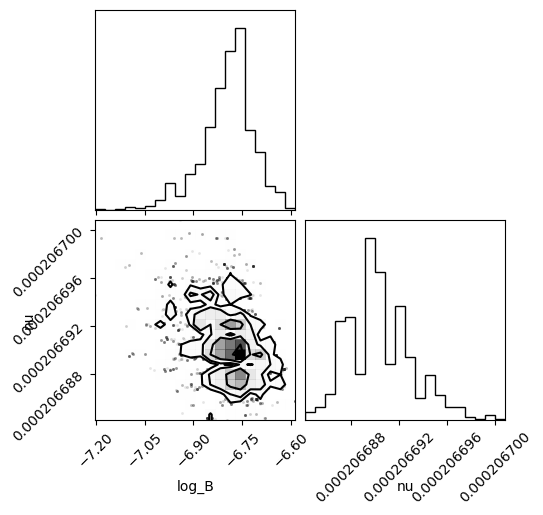

0.00025 0.0003
log_B_avg_1 = -6.788698725793816
nu_mode=0.00027960912955076475


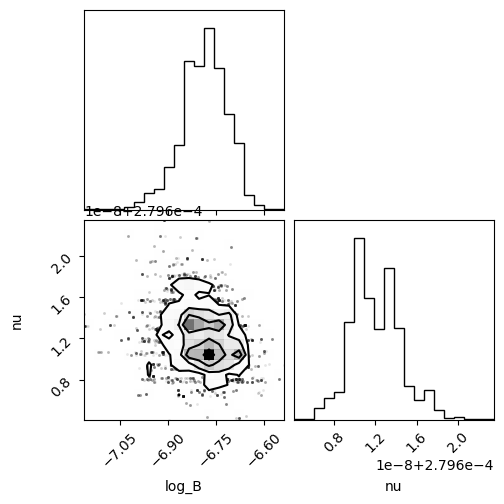

0.00033 0.0004
log_B_avg_2 = -6.781046286632891
nu_mode=0.0003525302919247412


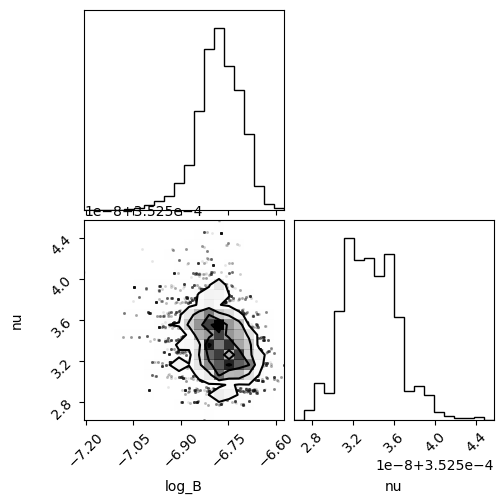

In [12]:
nu_modes = []
i = -1
for nu_min, nu_max in [(0.00020, 0.00022), (0.00025, 0.00030), (0.00033, 0.00040)]:
    i+=1
    nu_chain = chain[burn:, 3]
    log_B_chain = chain[burn:, 2]
    mask = np.logical_and(nu_chain > nu_min, nu_chain < nu_max)
    log_B_chain = log_B_chain[mask]
    nu_chain = nu_chain[mask]
    corner.corner(chain[burn:,2:4][mask], labels=["log_B", "nu"],  plot_contours=True)
    print(nu_min, nu_max)
    print(f"log_B_avg_{i} = {np.average(log_B_chain)}")
    
    mode_result = stats.mode(nu_chain)
    nu_mode = mode_result.mode
    print(f"{nu_mode=}")
    nu_modes.append(nu_mode)
    
    plt.show()

In [13]:
nu_modes = np.array([0.000206, 0.00028, 0.000350])
print(f"{nu_modes=}")


nu_modes=array([0.000206, 0.00028 , 0.00035 ])


In [14]:
nu0 = nu_modes[0]
nu1 = nu_modes[1]
nu2 = nu_modes[2]

print(f"{nu2 - nu1=}")
print(f"{(nu1 - nu0)=}")
print(f"{nu_modes / (nu2 - nu1)=}")

nu2 - nu1=7.000000000000002e-05
(nu1 - nu0)=7.399999999999998e-05
nu_modes / (nu2 - nu1)=array([2.94285714, 4.        , 5.        ])


####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J0023+0923
Chain shape = (100001, 10)


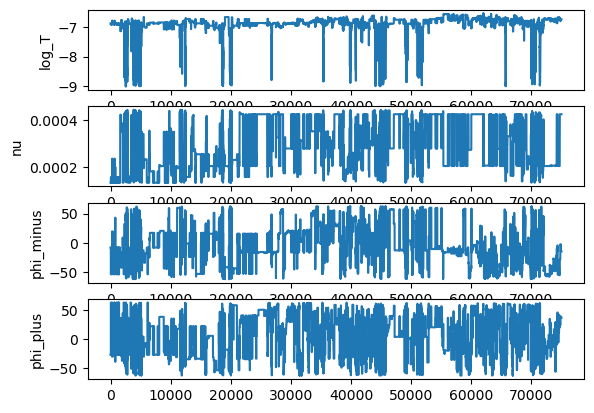

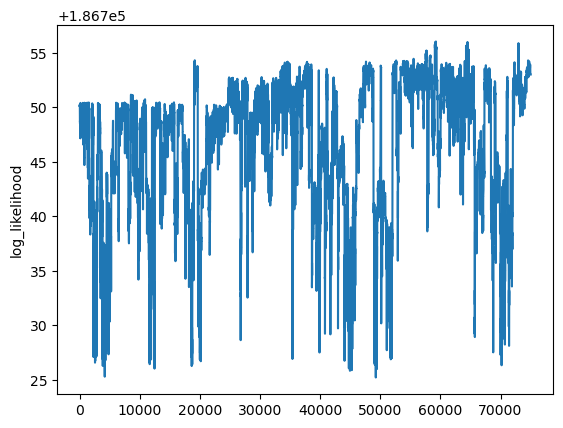

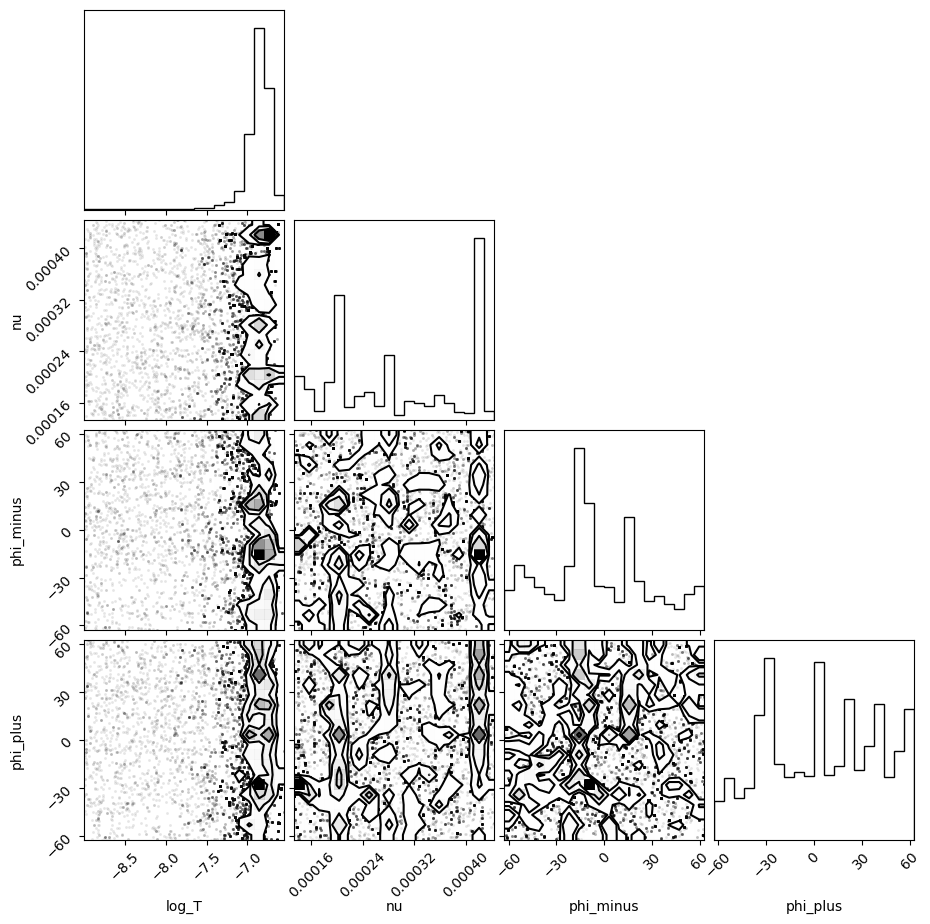

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J0610-2100
Chain shape = (100001, 10)


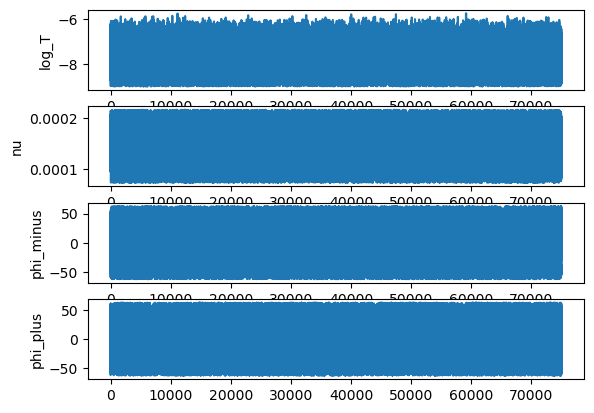

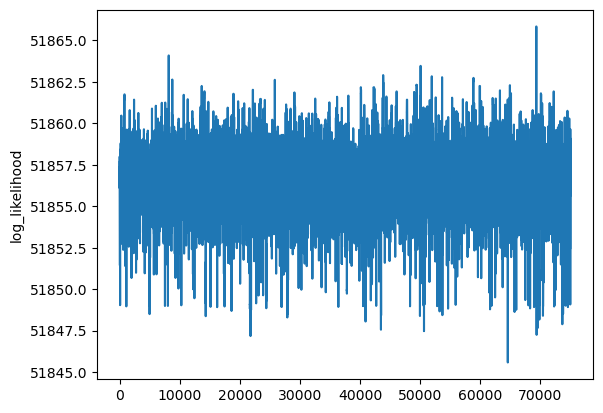

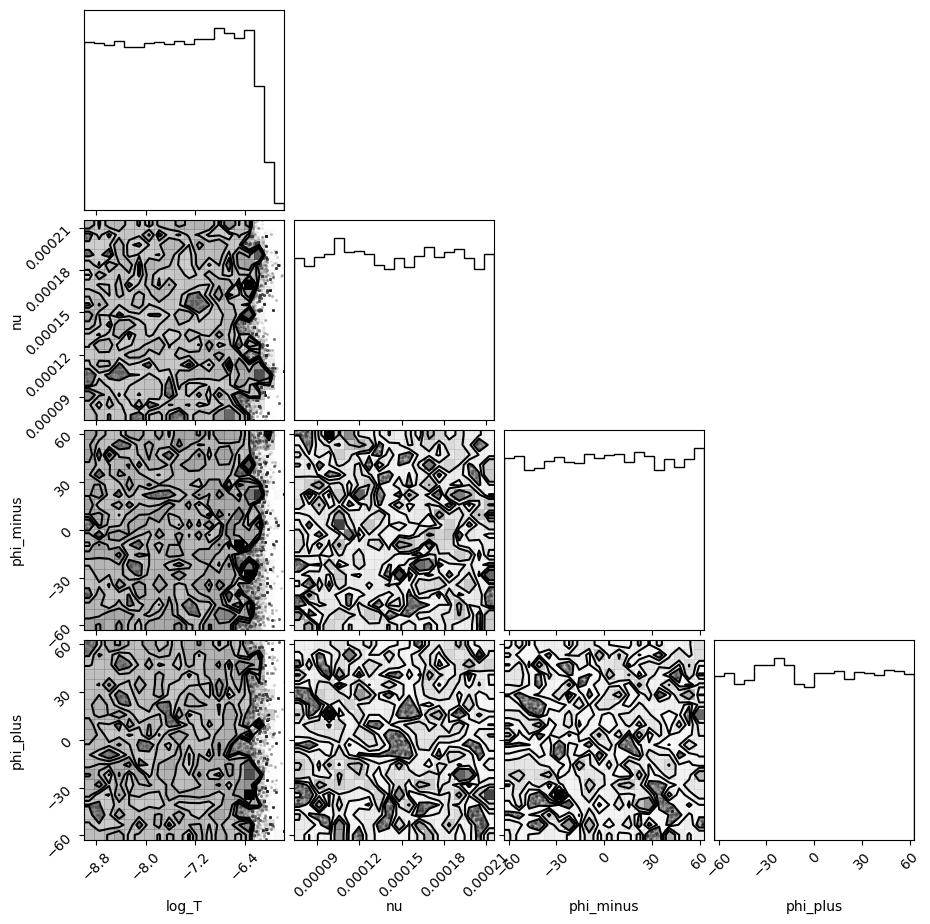

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J0636+5128
Chain shape = (100001, 10)


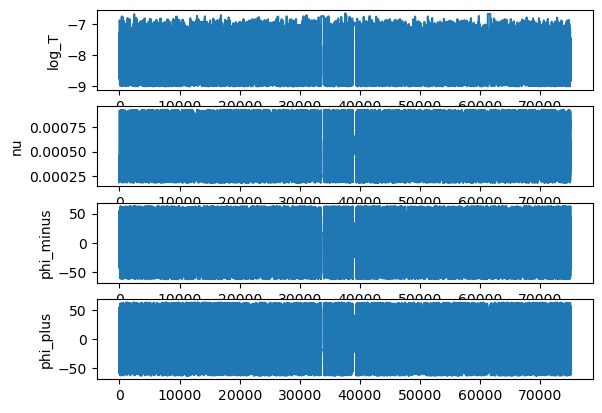

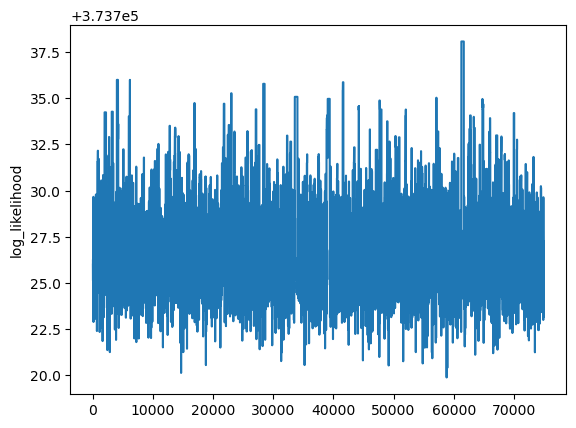

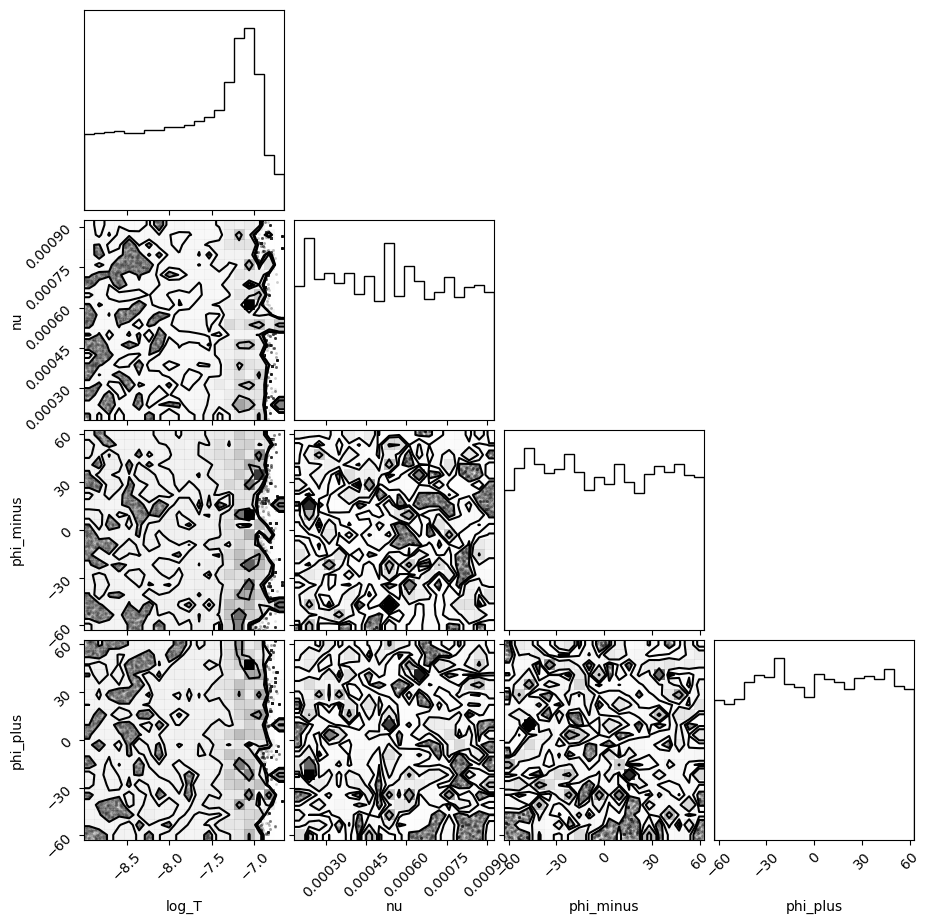

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J1719-1438
Chain shape = (100001, 10)


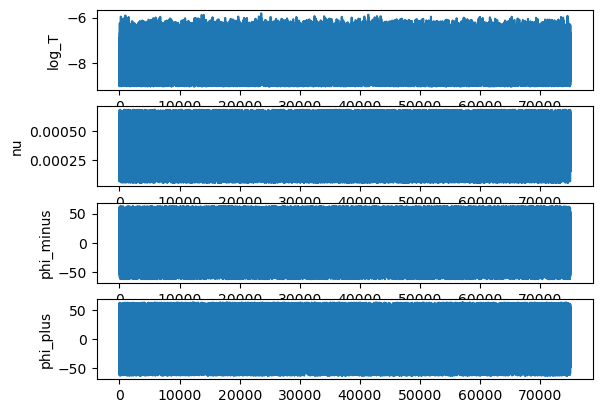

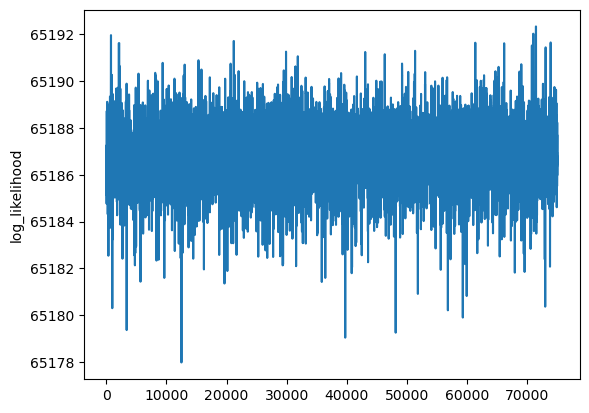

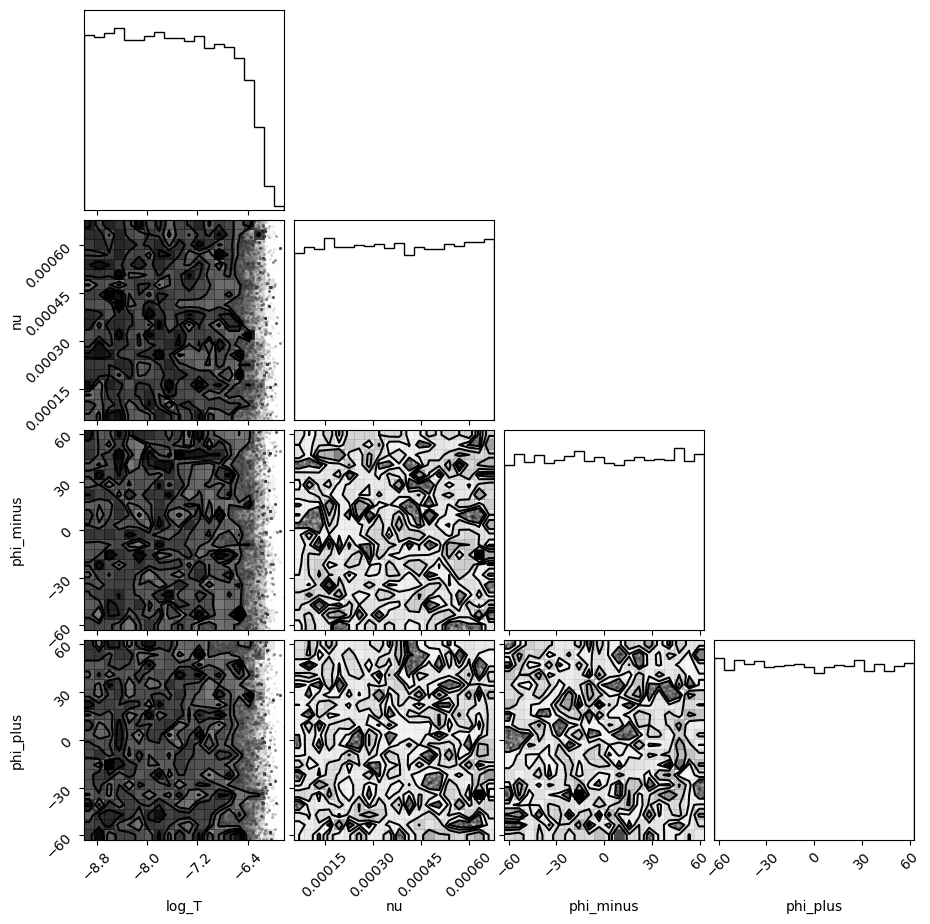

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J1745+1017
Chain shape = (100001, 10)


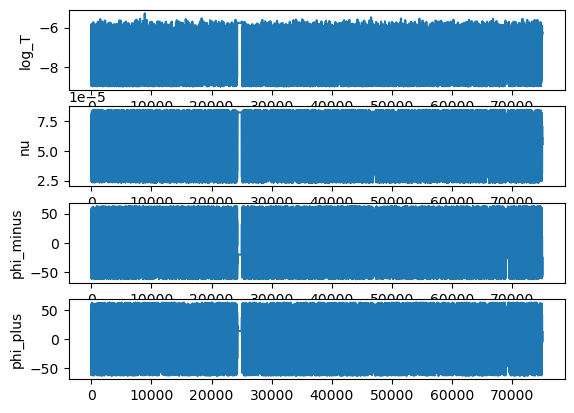

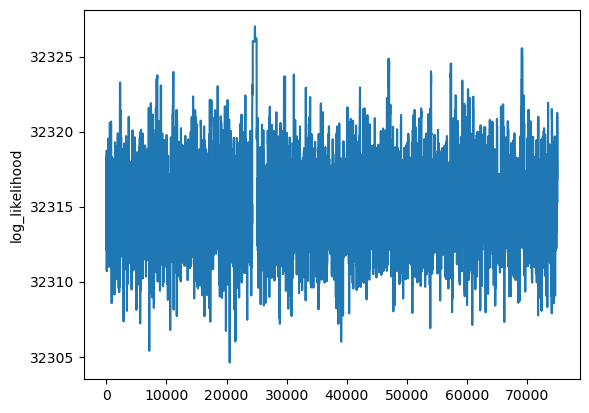

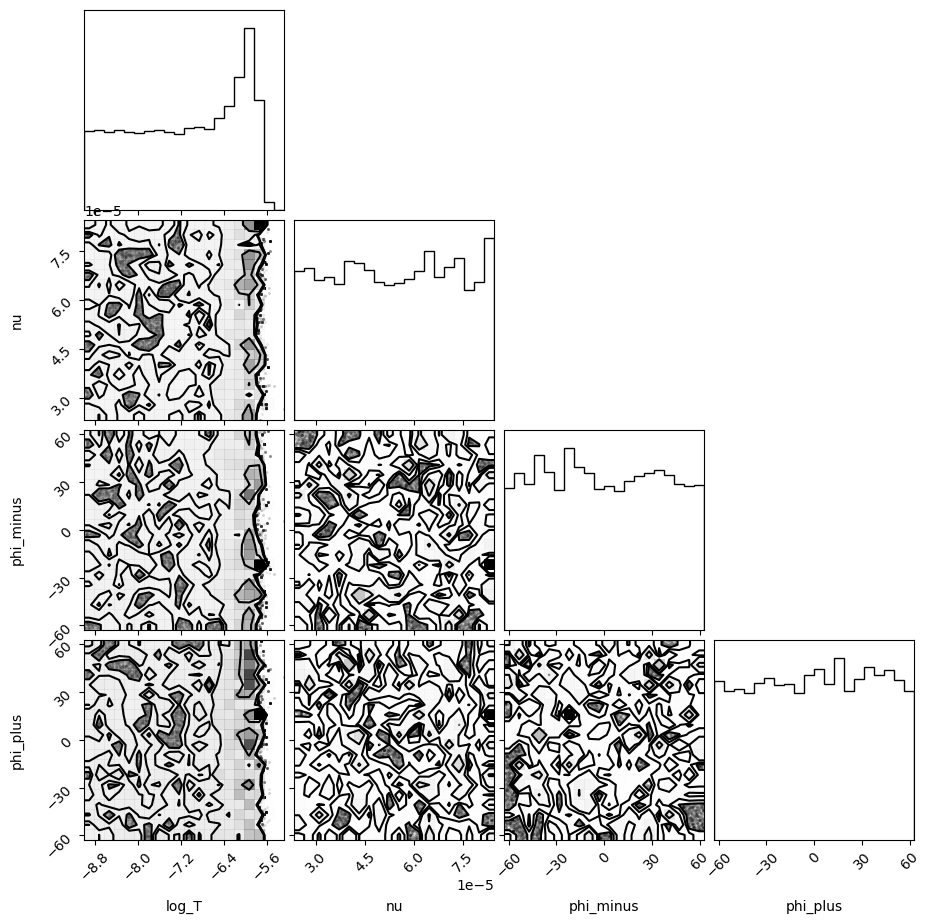

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J2214+3000
Chain shape = (100001, 10)


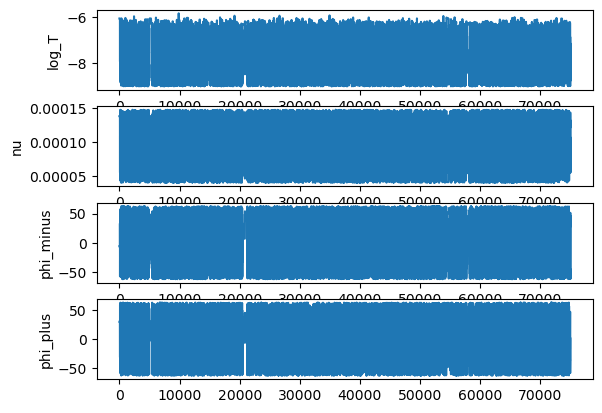

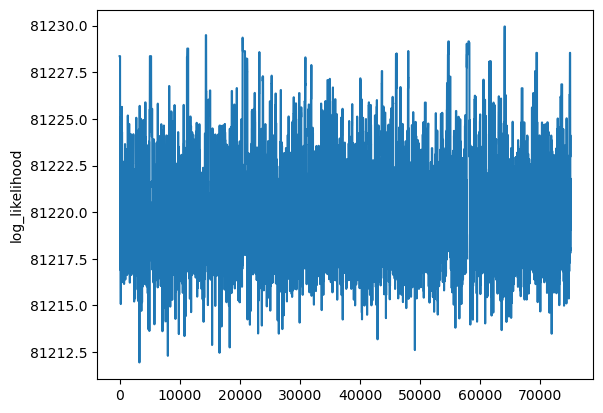

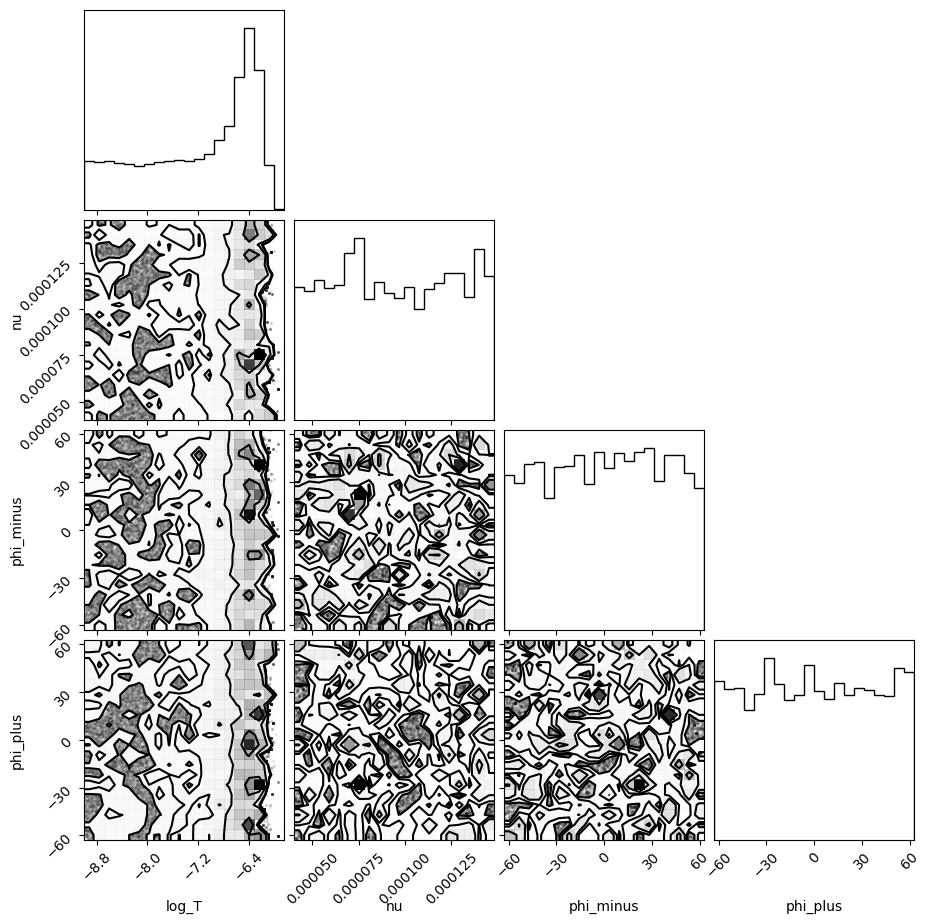

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J2234+0944
Chain shape = (100001, 10)


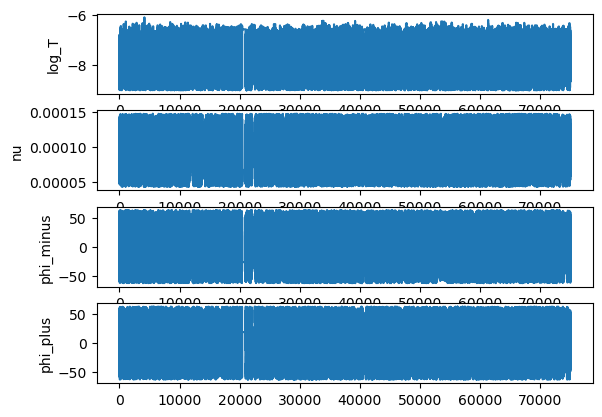

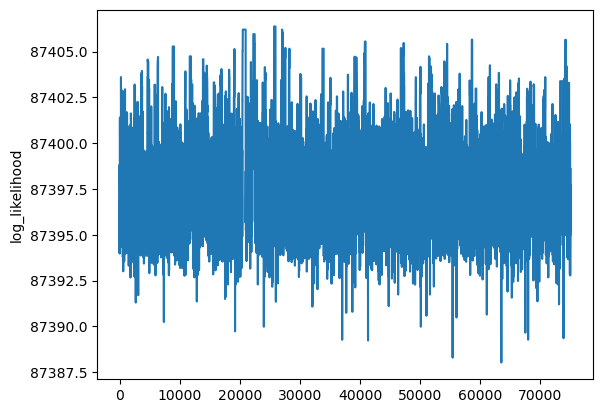

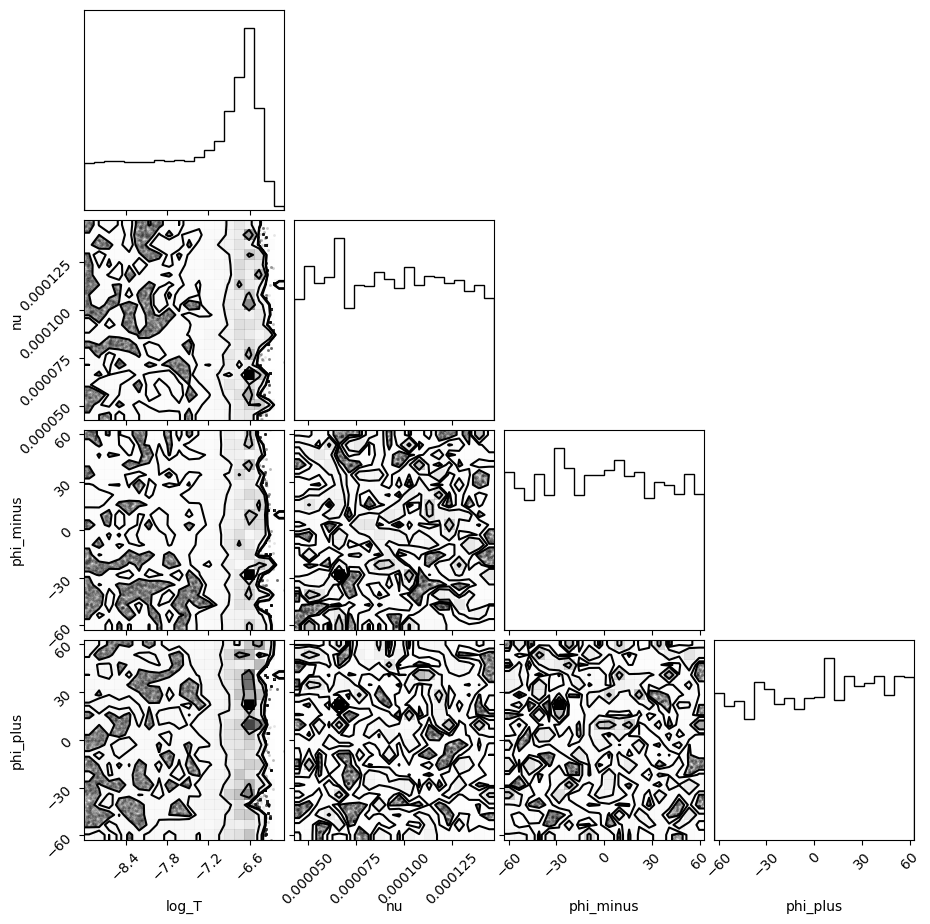

In [19]:
psrlist = ['J0023+0923','J0610-2100', 'J0636+5128', 'J1719-1438', 'J1745+1017','J2214+3000', 'J2234+0944']
all_chains = {}
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_04Mar_2025"
if psr is None:
    for psr in psrlist:
        chain_file = f"{chain_folder}/{psr}/chain_1.0.txt"
        chain = np.genfromtxt(chain_file)
        all_chains[psr] = chain
        print(("#"*100 + "\n")*4)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//4
        for i, param in enumerate(params):
            plt.subplot(ndim, 1, i + 1)
            plt.plot(chain[burn:, i+2], ls='-', marker=None, alpha=1.0)
            plt.ylabel(param)
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        plt.show()